<a href="https://colab.research.google.com/github/rahulkr060395/CAPSTONE-PROJECT/blob/master/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Question-3

### Importing libraries

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1

In [ ]:
age_group = pd.read_csv('AgeGroupDetails.csv')

In [ ]:
age_group.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [ ]:
age_group['Percentage'] = age_group['Percentage'].apply(lambda x: x.strip('%')).astype('float')

In [ ]:
age_group.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18
1,2,10-19,27,3.90
2,3,20-29,172,24.86
3,4,30-39,146,21.10
4,5,40-49,112,16.18


In [ ]:
age_group[age_group['TotalCases']==age_group['TotalCases'].max()] # most infected age group

,Sno,AgeGroup,TotalCases,Percentage
2,3,20-29,172,24.86


### Most infected age group: 20-29

### Part 2

In [ ]:
covid_india = pd.read_csv('covid_19_india.csv')

In [ ]:
covid_india.head()
covid_india.rename(columns={'State/UnionTerritory':'State/UT'},inplace = True)

In [ ]:
covid_india.head()

,Sno,Date,Time,State/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
a = pd.DataFrame(covid_india.groupby(['State/UT'])['Deaths'].max())
a.reset_index(inplace = True)
a = a.sort_values('Deaths',ascending=False)

b = pd.DataFrame(covid_india.groupby(['State/UT'])['Cured'].max())
b.reset_index(inplace = True)
b = b.sort_values('Cured',ascending=False)

c = pd.DataFrame(covid_india.groupby(['State/UT'])['Confirmed'].max())
c.reset_index(inplace = True)
c = c.sort_values('Confirmed',ascending=False)

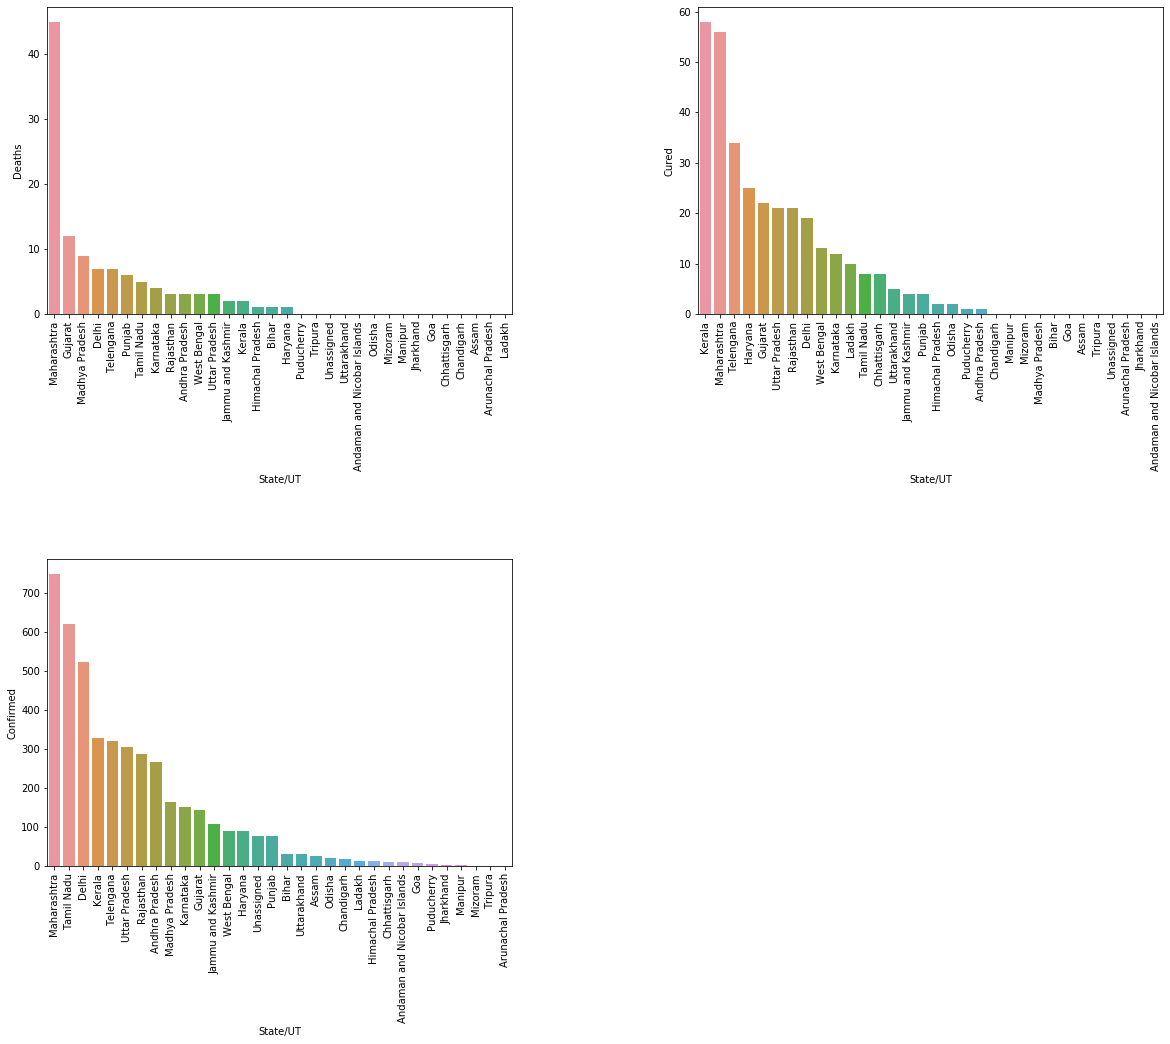

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.8, wspace=0.4)
plt.subplot(3,2,1)
plot = sns.barplot(a['State/UT'],a['Deaths'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);
plt.subplot(3,2,2)
plot = sns.barplot(b['State/UT'],b['Cured'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);
plt.subplot(3,2,3)
plot = sns.barplot(c['State/UT'],c['Confirmed'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);

### Part 3

In [ ]:
census = pd.read_csv('population_india_census2011.csv')

In [ ]:
census['Density'] = census['Density'].apply(lambda x: x.split("/")[0].replace(',',''))
census.set_index('Sno',inplace=True)

In [ ]:
census.rename(columns={'State / Union Territory':"State/UT"},inplace=True)
census['Density'] = census['Density'].astype('float')

In [ ]:
census.head()

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio
Sno,,,,,,,
1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)",828.0,912
2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365.0,929
3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)",1102.0,918
4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)",1029.0,953
5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236.0,931


In [ ]:
cases = pd.pivot_table(a,index='State/UT',values='Confirmed')

In [ ]:
density = pd.pivot_table(census,index='State/UT',values='Density')

In [ ]:
intensity = cases['Confirmed']/density['Density']

In [ ]:
cases['Density'] = density['Density']

In [ ]:
cases['Intensity'] = cases['Confirmed']/cases['Density']

In [ ]:
cases = cases.dropna()

In [ ]:
cases = cases.sort_values('Confirmed',ascending=False).reset_index()

In [ ]:
cases

,State/UT,Confirmed,Density,Intensity
0,Maharashtra,748,365.0,2.049315
1,Tamil Nadu,621,555.0,1.118919
2,Delhi,523,11297.0,0.046295
3,Kerala,327,859.0,0.380675
4,Telengana,321,312.0,1.028846
5,Uttar Pradesh,305,828.0,0.368357
6,Rajasthan,288,201.0,1.432836
7,Andhra Pradesh,266,303.0,0.877888
8,Madhya Pradesh,165,236.0,0.699153
9,Karnataka,151,319.0,0.473354


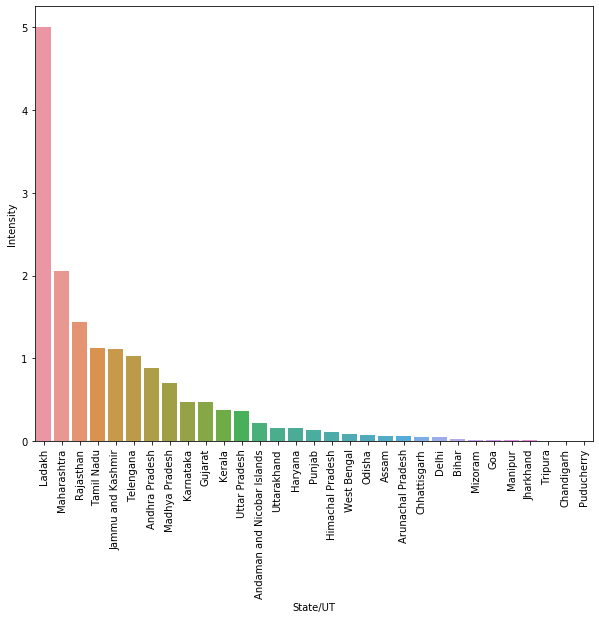

In [ ]:
sorted_cases = cases.sort_values('Intensity',ascending=False).reset_index()
plt.figure(figsize=(10,8))
plot1 = sns.barplot(x=sorted_cases['State/UT'],y=sorted_cases['Intensity'])
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90);


### Part 4

In [ ]:
IndividualDetails = pd.read_csv('IndividualDetails.csv')

In [ ]:
IndividualDetails['diagnosed_date'] = pd.to_datetime(IndividualDetails['diagnosed_date'])
IndividualDetails['status_change_date'] = pd.to_datetime(IndividualDetails['status_change_date'])

In [ ]:
IndividualDetails.head(2)

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,2020-01-30,20,F,Thrissur,Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan
1,1,KL-AL-P1,2020-02-02,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan


In [ ]:
IndividualDetails = IndividualDetails.replace('Ahmadabad','Ahmedabad')

In [ ]:
data = IndividualDetails.groupby(['detected_city'])['current_status'].count().to_frame()

In [ ]:
data = data.sort_values(['current_status'],ascending = False)

In [ ]:
hot_spots = data[data['current_status']>=10].reset_index() # city wise Hot Spots

In [ ]:
hot_spots.rename(columns = {'detected_city': 'City','current_status':'No. of Cases'},inplace=True)

In [ ]:
hot_spots

,City,No. of Cases
0,Mumbai,67
1,Bengaluru,41
2,Kasaragod,26
3,Pune,25
4,Ahmedabad,24
5,Nizamuddin area,24
6,Hyderabad,23
7,Mettupalayam,20
8,Bhilwara,19
9,Perundurai,17


### Part 5

In [ ]:
# filtering data date wise

In [ ]:
IndividualDetails.head(3)

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,2020-01-30,20,F,Thrissur,Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan
1,1,KL-AL-P1,2020-02-02,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan
2,2,KL-KS-P1,2020-03-02,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan


In [ ]:
IndividualDetails['current_status'].value_counts()

Hospitalized    3557
Recovered         89
Deceased          24
Migrated           1
Name: current_status, dtype: int64

In [ ]:
startdate,enddate = '2020-03-20','2020-04-10'

In [ ]:
filter1 = IndividualDetails[(IndividualDetails['status_change_date']>=startdate)&(IndividualDetails['status_change_date']<=enddate)]

In [ ]:
filter1.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
6,6,NaN,2020-04-03,55,NaN,Gurugram,Gurugram,Haryana,Italy,Recovered,2020-03-29,Travelled from Italy
7,7,NaN,2020-04-03,55,NaN,Gurugram,Gurugram,Haryana,Italy,Recovered,2020-03-29,Travelled from Italy
8,8,NaN,2020-04-03,55,NaN,Gurugram,Gurugram,Haryana,Italy,Recovered,2020-03-29,Travelled from Italy
9,9,NaN,2020-04-03,55,NaN,Gurugram,Gurugram,Haryana,Italy,Recovered,2020-03-29,Travelled from Italy
10,10,NaN,2020-04-03,55,NaN,Gurugram,Gurugram,Haryana,Italy,Recovered,2020-03-29,Travelled from Italy


In [ ]:
#df = filter1.groupby(['detected_state','detected_city'])['current_status'].count().to_frame()
df = filter1.groupby(['detected_state','detected_city'])['current_status'].value_counts().to_frame()

In [ ]:
df.columns

Index(['current_status'], dtype='object')

In [ ]:
df.rename(columns={'current_status':'count'},inplace=True)
df.columns

Index(['count'], dtype='object')

In [ ]:
start_week1,end_week1 = '2020-03-20','2020-03-26'
start_week2,end_week2 = '2020-03-20','2020-04-02'
start_week3,end_week3 = '2020-03-20','2020-04-10'

df_week1 = IndividualDetails[(IndividualDetails['status_change_date']>=start_week1)&(IndividualDetails['status_change_date']<=end_week1)]
df_week2 = IndividualDetails[(IndividualDetails['status_change_date']>=start_week2)&(IndividualDetails['status_change_date']<=end_week2)]
df_week3 = IndividualDetails[(IndividualDetails['status_change_date']>=start_week3)&(IndividualDetails['status_change_date']<=end_week3)]



week1 = df_week1.groupby(['detected_state','detected_city'])['current_status'].value_counts().to_frame()
week2 = df_week2.groupby(['detected_state','detected_city'])['current_status'].value_counts().to_frame()
week3 = df_week3.groupby(['detected_state','detected_city'])['current_status'].value_counts().to_frame()

week1.rename(columns={'current_status':'count'},inplace = True)
week2.rename(columns={'current_status':'count'},inplace = True)
week3.rename(columns={'current_status':'count'},inplace = True)

week1.reset_index(inplace=True)
week2.reset_index(inplace=True)
week3.reset_index(inplace=True)

In [ ]:
hot_spot_week1 = week1
week1_hot_spot = hot_spot_week1.groupby(['detected_state','detected_city','current_status']).sum().groupby(level=0).cumsum()
week1_hot_spot.reset_index(inplace=True)

In [ ]:
week1_hot_spot.head()

,detected_state,detected_city,current_status,count
0,Andhra Pradesh,Rajahmundry,Hospitalized,1
1,Andhra Pradesh,Srikalahasti,Hospitalized,2
2,Andhra Pradesh,Vijayawada,Hospitalized,5
3,Andhra Pradesh,Visakhapatnam,Hospitalized,7
4,Bihar,Munger,Deceased,1


In [ ]:
q1 = pd.DataFrame(week1_hot_spot.groupby(['detected_state','current_status'])['count'].sum())

In [ ]:
hot_spot_week2 = week2
week2_hot_spot = hot_spot_week2.groupby(['detected_state','detected_city','current_status']).sum().groupby(level=0).cumsum()
#week2_hot_spot.reset_index(inplace=True)
q2 = pd.DataFrame(week2_hot_spot.groupby(['detected_state','current_status'])['count'].sum())

In [ ]:
hot_spot_week3 = week3
week3_hot_spot = hot_spot_week3.groupby(['detected_state','detected_city','current_status']).sum().groupby(level=0).cumsum()
#week3_hot_spot.reset_index(inplace=True)
q3 = pd.DataFrame(week3_hot_spot.groupby(['detected_state','current_status'])['count'].sum())

In [ ]:
q1.rename(columns={'count':'week1_count'},inplace=True)
q2.rename(columns={'week1_count':'week2_count'},inplace=True)
q3.rename(columns={'week1_count':'week3_count'},inplace=True)

## Table represents the change in the hotspots across the country

In [ ]:
pd.concat([q1,q2,q3],axis=1)

week1_count  week2_count  week3_count
detected_state    current_status                                       
Andhra Pradesh    Hospitalized           15.0        192.0          192
                  Recovered               NaN         25.0           25
Assam             Hospitalized            NaN          1.0            1
Bihar             Deceased                1.0          1.0            1
                  Hospitalized            2.0          2.0            2
Chandigarh        Hospitalized            6.0          6.0            6
Chhattisgarh      Hospitalized           12.0         12.0           12
Delhi             Hospitalized           35.0        114.0          114
                  Migrated                9.0         33.0           33
Goa               Hospitalized            3.0          3.0            3
Gujarat           Deceased               22.0         32.0           32
                  Hospitalized          107.0        216.0          216
                  Recovered              14.0         17.0           17
Haryana           Hospitalized           24.0         78.0           91
                  Recovered               NaN         15.0           17
Himachal Pradesh  Deceased                1.0          1.0            1
                  Hospitalized            2.0          2.0            2
                  Recovered               NaN          3.0            3
Jammu and Kashmir Hospitalized            7.0         30.0           30
Jharkhand         Hospitalized            NaN          1.0            1
Karnataka         Deceased                NaN         73.0           73
                  Hospitalized          273.0        782.0          782
                  Recovered              24.0         37.0           37
Kerala            Deceased                NaN          1.0            1
                  Hospitalized           97.0        315.0          315
                  Recovered             108.0        301.0          301
Ladakh            Hospitalized           11.0         11.0           11
Madhya Pradesh    Deceased               17.0         20.0           20
                  Hospitalized           27.0         32.0           32
Maharashtra       Deceased                5.0          5.0            5
                  Hospitalized          511.0        705.0          775
                  Recovered              60.0         75.0           76
Manipur           Hospitalized            1.0          1.0            1
Odisha            Hospitalized            1.0          2.0            2
Punjab            Hospitalized           44.0         44.0           44
Rajasthan         Hospitalized          125.0        171.0          174
                  Recovered               NaN          NaN           28
Tamil Nadu        Deceased                9.0         15.0           15
                  Hospitalized          119.0        421.0          421
                  Recovered               NaN         10.0           10
Telangana         Hospitalized          191.0        216.0          216
Uttar Pradesh     Hospitalized          135.0        178.0          204
                  Recovered               1.0          1.0            3
Uttarakhand       Hospitalized            1.0          1.0            1
West Bengal       Deceased                4.0          4.0            4
                  Hospitalized           19.0         40.0           40
                  Recovered              13.0         13.0           13

### Part 6

In [ ]:
IndividualDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3671 entries, 0 to 3670
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  3671 non-null   int64         
 1   government_id       817 non-null    object        
 2   diagnosed_date      3671 non-null   datetime64[ns]
 3   age                 805 non-null    object        
 4   gender              1035 non-null   object        
 5   detected_city       822 non-null    object        
 6   detected_district   2744 non-null   object        
 7   detected_state      3671 non-null   object        
 8   nationality         427 non-null    object        
 9   current_status      3671 non-null   object        
 10  status_change_date  3570 non-null   datetime64[ns]
 11  notes               2640 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 344.3+ KB


In [ ]:
notes = IndividualDetails[IndividualDetails['notes'].isna()==False]

In [ ]:
data = notes['notes'].value_counts().to_frame().reset_index()

In [ ]:
a = list(data['index'])
b = []

In [ ]:
primary_cases =  ['Travel','travel','Travelled','travelled','Abroad','International','UK-returned','abroad']
secondary_case = ['no travel', 'locally','contact', 'contacts','relative', 'conference', 'father','mother', 'brother','sister', 'daughter', 'doctor', 'tablighi',
               'compounder', 'hospital', 'son','nurse', 'relative','wife','friend','tourists', 'guide','grandmother',
               'family','religious','congregation','driver','cab','related','tenant','worker','cook','uncle','aunt','event']

primary_sent = '|'.join(primary_cases)
sec_sent = '|'.join(secondary_case)


In [ ]:
Primary = notes[notes['notes'].str.contains(primary_sent,case=False) == True] 
sec = notes[notes['notes'].str.contains(sec_sent,case=False) == True] 

In [ ]:
Primary['flag'] = 'p'
sec['flag']='s'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
total = pd.concat([Primary,sec])

In [ ]:
total.sample(5)

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes,flag
156,156,NaN,2020-03-18,21,M,Pimpri-Chinchwad,Pune,Maharashtra,India,Hospitalized,2020-03-18,"Travelled from Philippines, Singapore and Sri ...",p
2758,2758,TN-P325,2020-03-04,NaN,NaN,NaN,Chennai,Tamil Nadu,NaN,Hospitalized,2020-03-04,Attended Delhi Religious Conference,s
1298,1298,NaN,2020-03-30,NaN,M,Nizamuddin area,South Delhi,Delhi,NaN,Hospitalized,2020-03-30,attended religious event Tablighi Jamaat in delhi,s
836,836,NaN,2020-03-27,NaN,NaN,NaN,Kasaragod,Kerala,NaN,Hospitalized,2020-03-27,Contact transmission. details awaited,s
140,140,TS-P5,2020-03-17,52,M,Hyderabad,Hyderabad,Telangana,Indonesia,Hospitalized,2020-03-17,Indonesian national; The patient had flown int...,s


In [ ]:
data1 = total.groupby(['detected_state'])['flag'].value_counts().to_frame()

In [ ]:
data1.rename(columns={'flag':'count'},inplace=True)

In [ ]:
#data2 = data1.set_index('index').drop('level_0',axis=1)

In [ ]:
data1.head()

count
detected_state              flag       
Andaman and Nicobar Islands p         6
                            s         3
Andhra Pradesh              s        28
                            p        15
Arunachal Pradesh           s         1

In [ ]:
total_cases = data1.groupby('detected_state')['count'].sum().to_frame()

In [ ]:
total_cases.head()

,count
detected_state,
Andaman and Nicobar Islands,9
Andhra Pradesh,43
Arunachal Pradesh,1
Assam,18
Bihar,23


In [ ]:
quantify = ((data1['count']/total_cases['count'])*100).to_frame().reset_index()
quantify

,detected_state,flag,count
0,Andaman and Nicobar Islands,p,66.666667
1,Andaman and Nicobar Islands,s,33.333333
2,Andhra Pradesh,s,65.116279
3,Andhra Pradesh,p,34.883721
4,Arunachal Pradesh,s,100.000000
5,Assam,s,100.000000
6,Bihar,p,73.913043
7,Bihar,s,26.086957
8,Chandigarh,s,68.750000
9,Chandigarh,p,31.250000


### Part 7

## Assumptions made:
* Samples tested 100000 as of 10-Apr-2020 from 01-Feb-2020 i.e. 70 days
* Rate of increase of samples tested is 10% per day
* Number of labs as of 10-Apr-2020 were calculated using the assumption made and considereing 100 tests per day per lab


In [ ]:
#total_case11 = 5496 # calulated based on the data provided in covid-19
total_samples_tested = 100000
rate  = 0.1
additional_cases11 = 0
additional_samples = 0
for i in range(10):
    #additional_cases11 = (1+rate)*total_case11
    additional_samples = (1+rate)*total_samples_tested
    total_case11 = additional_cases11
    total_samples_tested = additional_samples
    
print(int(total_samples_tested))

259374


In [ ]:
#additional = total_case11 - 5496

In [ ]:
additional_samples_per_day = 159374/10

In [ ]:
tests_per_day = 100000/70

In [ ]:
existing_labs = tests_per_day/100

In [ ]:
int(existing_labs)

14

In [ ]:
additional_labs_required = (additional_samples_per_day/100) - existing_labs

In [ ]:
int(additional_labs_required)

145

### Additional labs required: 145

### Part 8 and Part 9

In [ ]:
covid_india.head()
covid_india['Date'] = pd.to_datetime(covid_india['Date'],dayfirst=True)

In [ ]:
covid_india.head()

,Sno,Date,Time,State/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
a = pd.DataFrame(covid_india.groupby(['Date'])['Confirmed'].max())
date1,date2 = '2020-02-01','2020-03-23'

In [ ]:
daily_cases = pd.DataFrame(covid_india.groupby('Date').apply(lambda x: x.groupby('State/UT')['Confirmed'].max().sum())).reset_index()

In [ ]:
filter2 = daily_cases[(daily_cases['Date']>=startdate)&((daily_cases['Date']<=enddate))] 
filter3 = daily_cases[(daily_cases['Date']>=date1)&((daily_cases['Date']<=date2))] 

In [ ]:
filter2

,Date,0
50,2020-03-20,223
51,2020-03-21,283
52,2020-03-22,360
53,2020-03-23,433
54,2020-03-24,519
55,2020-03-25,606
56,2020-03-26,694
57,2020-03-27,724
58,2020-03-28,909
59,2020-03-29,1024


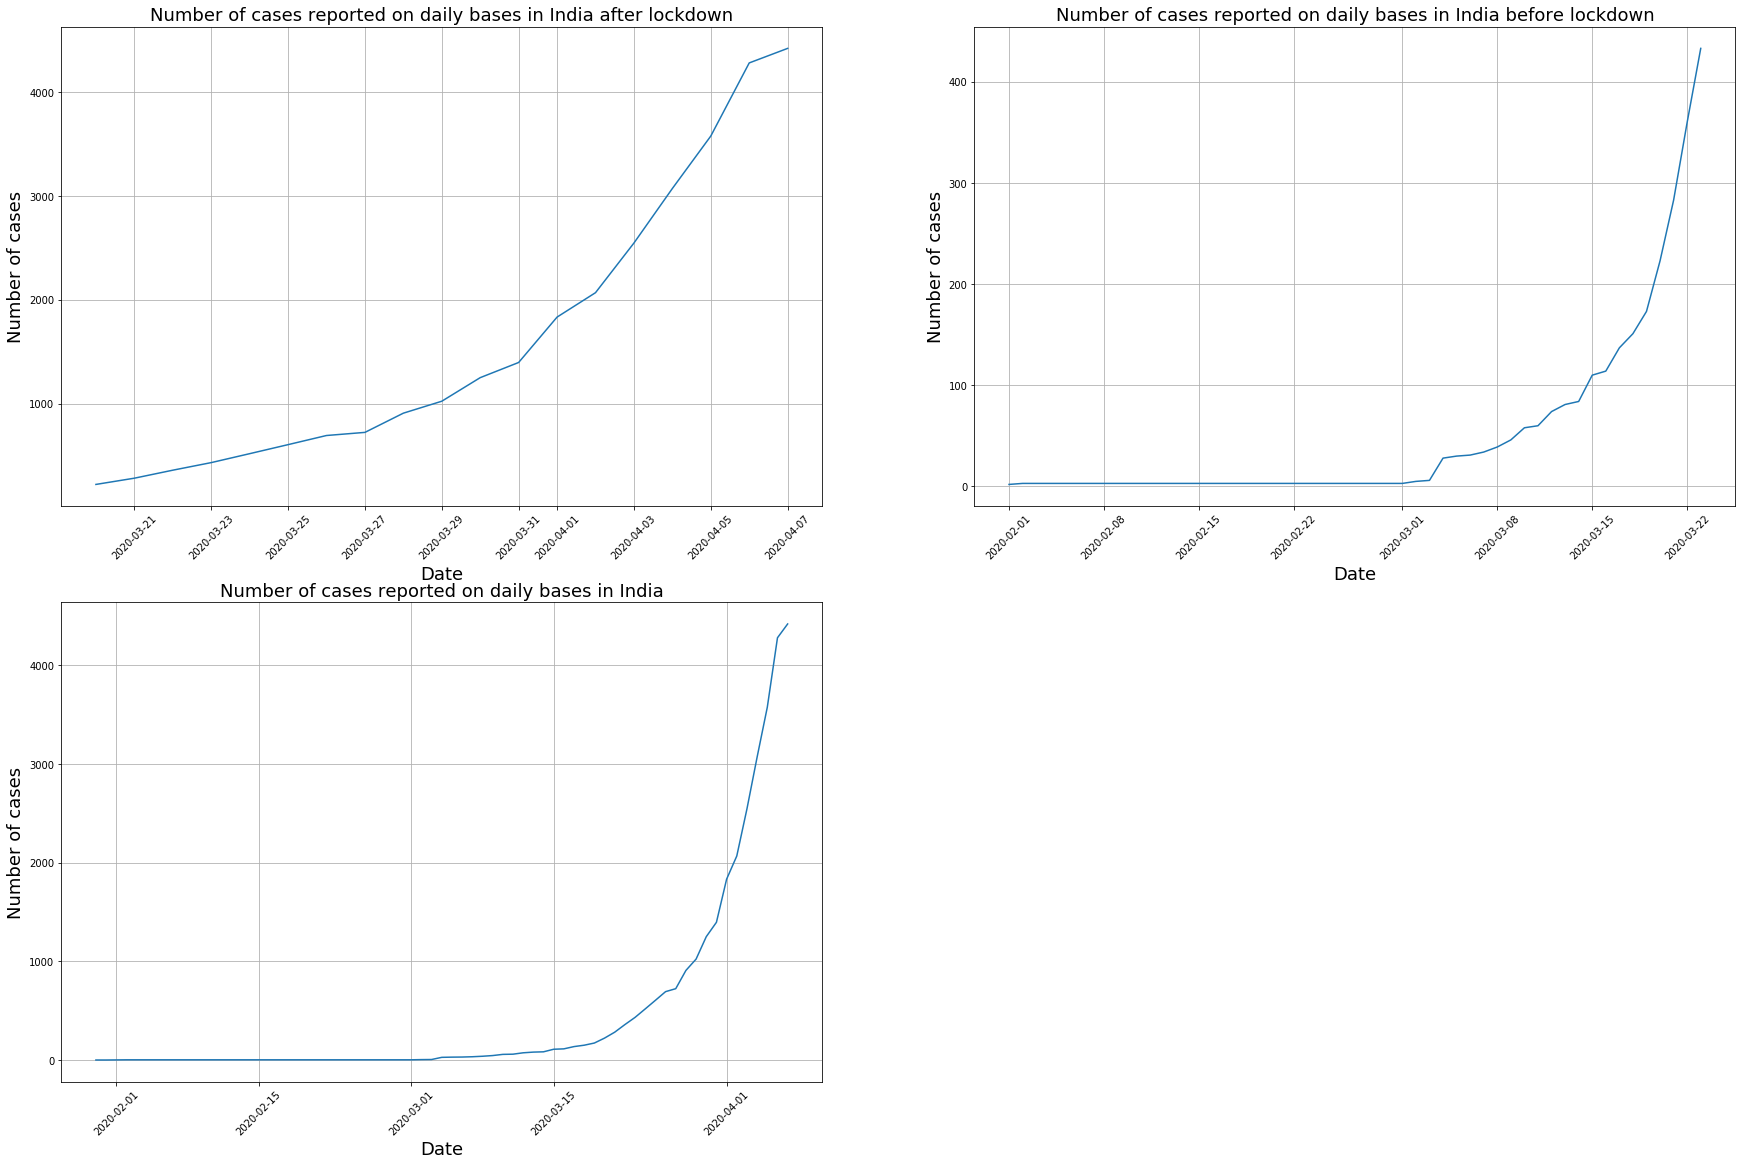

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(3,2,1)
sns.lineplot(x = filter2['Date'], y = filter2[0])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Number of cases', fontsize = 18)
plt.title('Number of cases reported on daily bases in India after lockdown', fontsize = 18);
plt.xticks(rotation=45);
plt.grid()
plt.subplot(3,2,2)
sns.lineplot(x = filter3['Date'], y = filter3[0])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Number of cases', fontsize = 18)
plt.title('Number of cases reported on daily bases in India before lockdown', fontsize = 18);
#sns.set_xticktlabels(sns.lineplot(x = a['Date'], y = a['cumsum']).get_xticklabels(),rotation=90);
plt.xticks(rotation=45);
plt.grid()
plt.subplot(3,2,3)
sns.lineplot(x = daily_cases['Date'], y = daily_cases[0])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Number of cases', fontsize = 18)
plt.title('Number of cases reported on daily bases in India', fontsize = 18);
plt.xticks(rotation=45);
plt.grid()

### Effect of lockdown:
* Based on the plots above, It has been observed that the rate of doubling of the covid-19 cases has increaed after lockdown
* Lockdown has not been effective in terms of decresasing the rate of doubling covid-19 cases